<a href="https://colab.research.google.com/github/Sebastian2658/AED_DS_Salary/blob/main/Lstms_practicos_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemas de secuencia de uno a muchos con una sola característica usando LSTMs y BiLSTMs

El problema de secuencia de números de uno a muchos pueden ser modelados con LSTMs donde  los datos de entrada tienen un paso de tiempo con una característica y la salida contiene un vector de múltiples valores o varios pasos de tiempo. En esta sección, veremos cómo resolver problemas de secuencia de números de uno a muchos en la cual un LSTM predice una secuencia de dos números para cualquier  nueva entrada (Ejercicios tomados de la página de [Malik](https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras-part-2/).

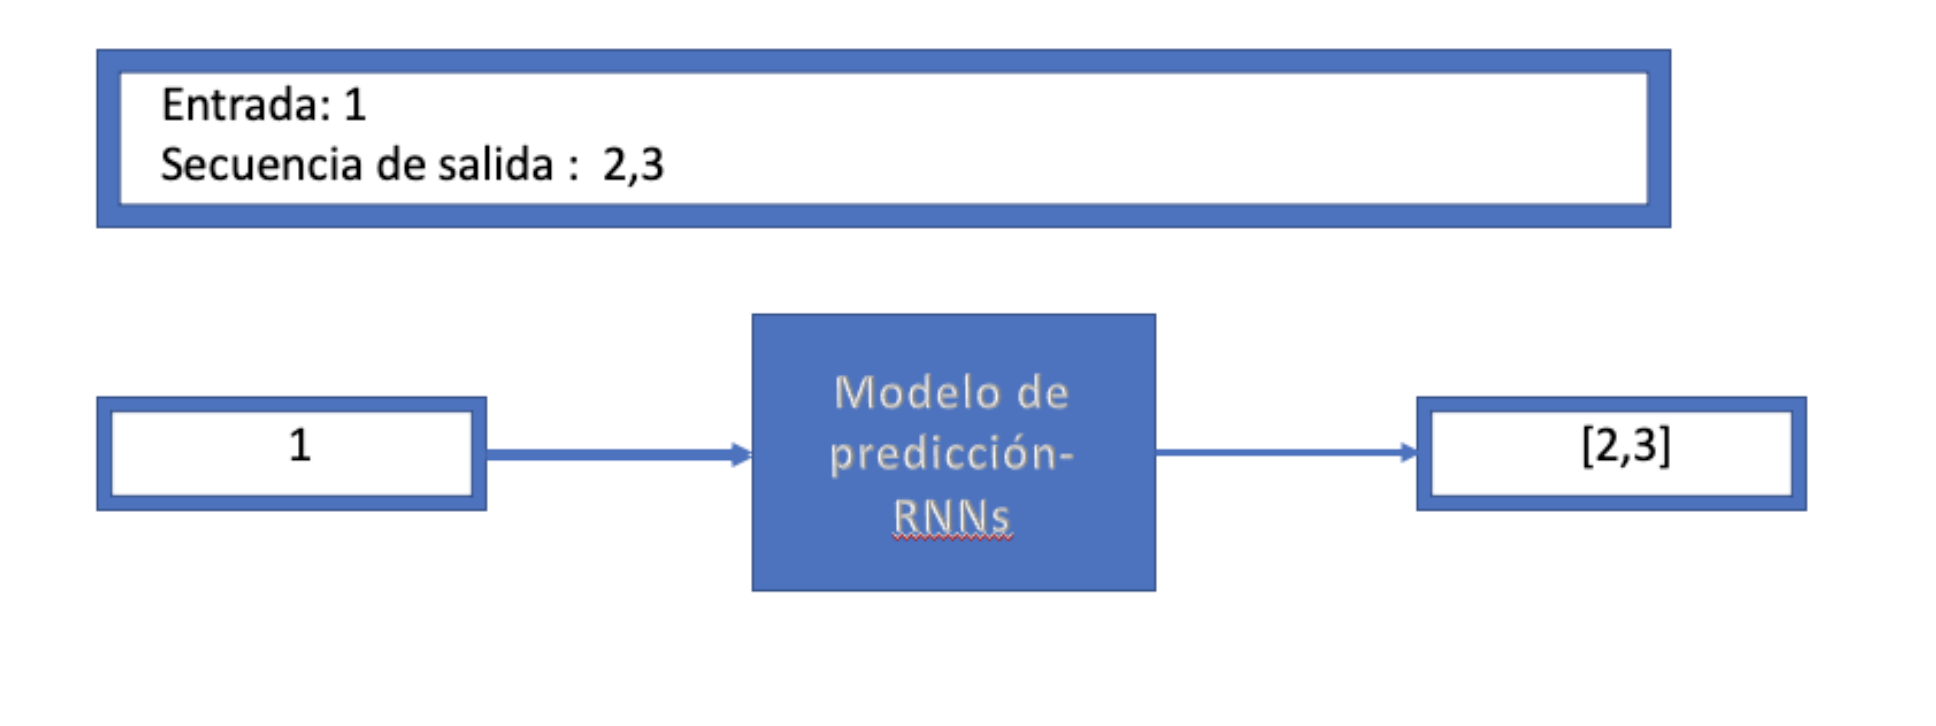

# Importe de las librerías de keras-Tensorflow

Primero se instala Tensorflow y luego se declaran las librerías de Keras-Temsorflow para el procesamiento de las diferentes capas y  modelos de RNNs. TAmbién se importa la librería de numpay para  el procesamiento matricial.

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.1
    Uninstalling ml-dtypes-0.3.1:
      Successfully uninstalled ml-dtypes-0

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
#from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
#from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

# Creación del dataset

El dataset de entrenamiento y validación corresponde al conjunto (X,Y), tal que  X es un vector de 1 ..20 números. Es decir, X tiene una entrada de una característica. Nuestra entrada contiene 20 muestras con un paso de tiempo y un valor de característica. Para cada valor de la muestra de entrada, Y es un  vector correspondiente a los siguientes dos números para cada elemento de X. Por ejemplo, si la entrada es 4, el vector de salida  es  [5,6]. Se crea  la lista de parejas de conecutivos de los valores de X usando [numpy](https://numpy.org)

In [ ]:
X = list()
Y = list()
G = list()
X = [x+1 for x in range(20)]
X1 = [x+1 for x in range(20)]
Y = [d + 1 for d in X1]
Z = [z + 1 for z in Y]
X2 = np.column_stack((Y, Z))

print(X1,X2)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [[ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 11]
 [11 12]
 [12 13]
 [13 14]
 [14 15]
 [15 16]
 [16 17]
 [17 18]
 [18 19]
 [19 20]
 [20 21]
 [21 22]]


# El siguiente script redimensiona los datos para el LSTM,  20 muestras, una entrada y una caracaterística.

In [ ]:
X1 = array(X1).reshape(20, 1, 1)
print(X1)

[[[ 1]]

 [[ 2]]

 [[ 3]]

 [[ 4]]

 [[ 5]]

 [[ 6]]

 [[ 7]]

 [[ 8]]

 [[ 9]]

 [[10]]

 [[11]]

 [[12]]

 [[13]]

 [[14]]

 [[15]]

 [[16]]

 [[17]]

 [[18]]

 [[19]]

 [[20]]]


# Modelo simple de LSTM

model=Sequential(), Apila un  conjunto de capas donde cada capa tiene exactamente un tensor de entrada y un tensor de salida.

model.add(LSTM(50, activation='relu', input_shape=(1, 1))), adiciona al modelo secuencial un LSTM totalmente conectado que tiene 50 unidades  como parámetros, 50 unidades.  La mayoría de los diagramas LSTM/RNN solo muestran las células ocultas, pero nunca las unidades de esas células. De ahí la confusión. Cada capa oculta tiene celdas ocultas, tantas como el número de pasos de tiempo. Además, cada celda oculta se compone de varias unidades ocultas, como en el siguiente diagrama. Por lo tanto, la dimensionalidad de una matriz de capa oculta en RNN es (número de pasos de tiempo, número de unidades ocultas). (Ver figura tomada de https://tung2389.github.io/coding-note/unitslstm).


Los otros parámetros del LSTM son la función de activación Relu (Rectified Linear Units) y la entrada input_shape(1,1) que tiene 1 sola entrada con una característica.
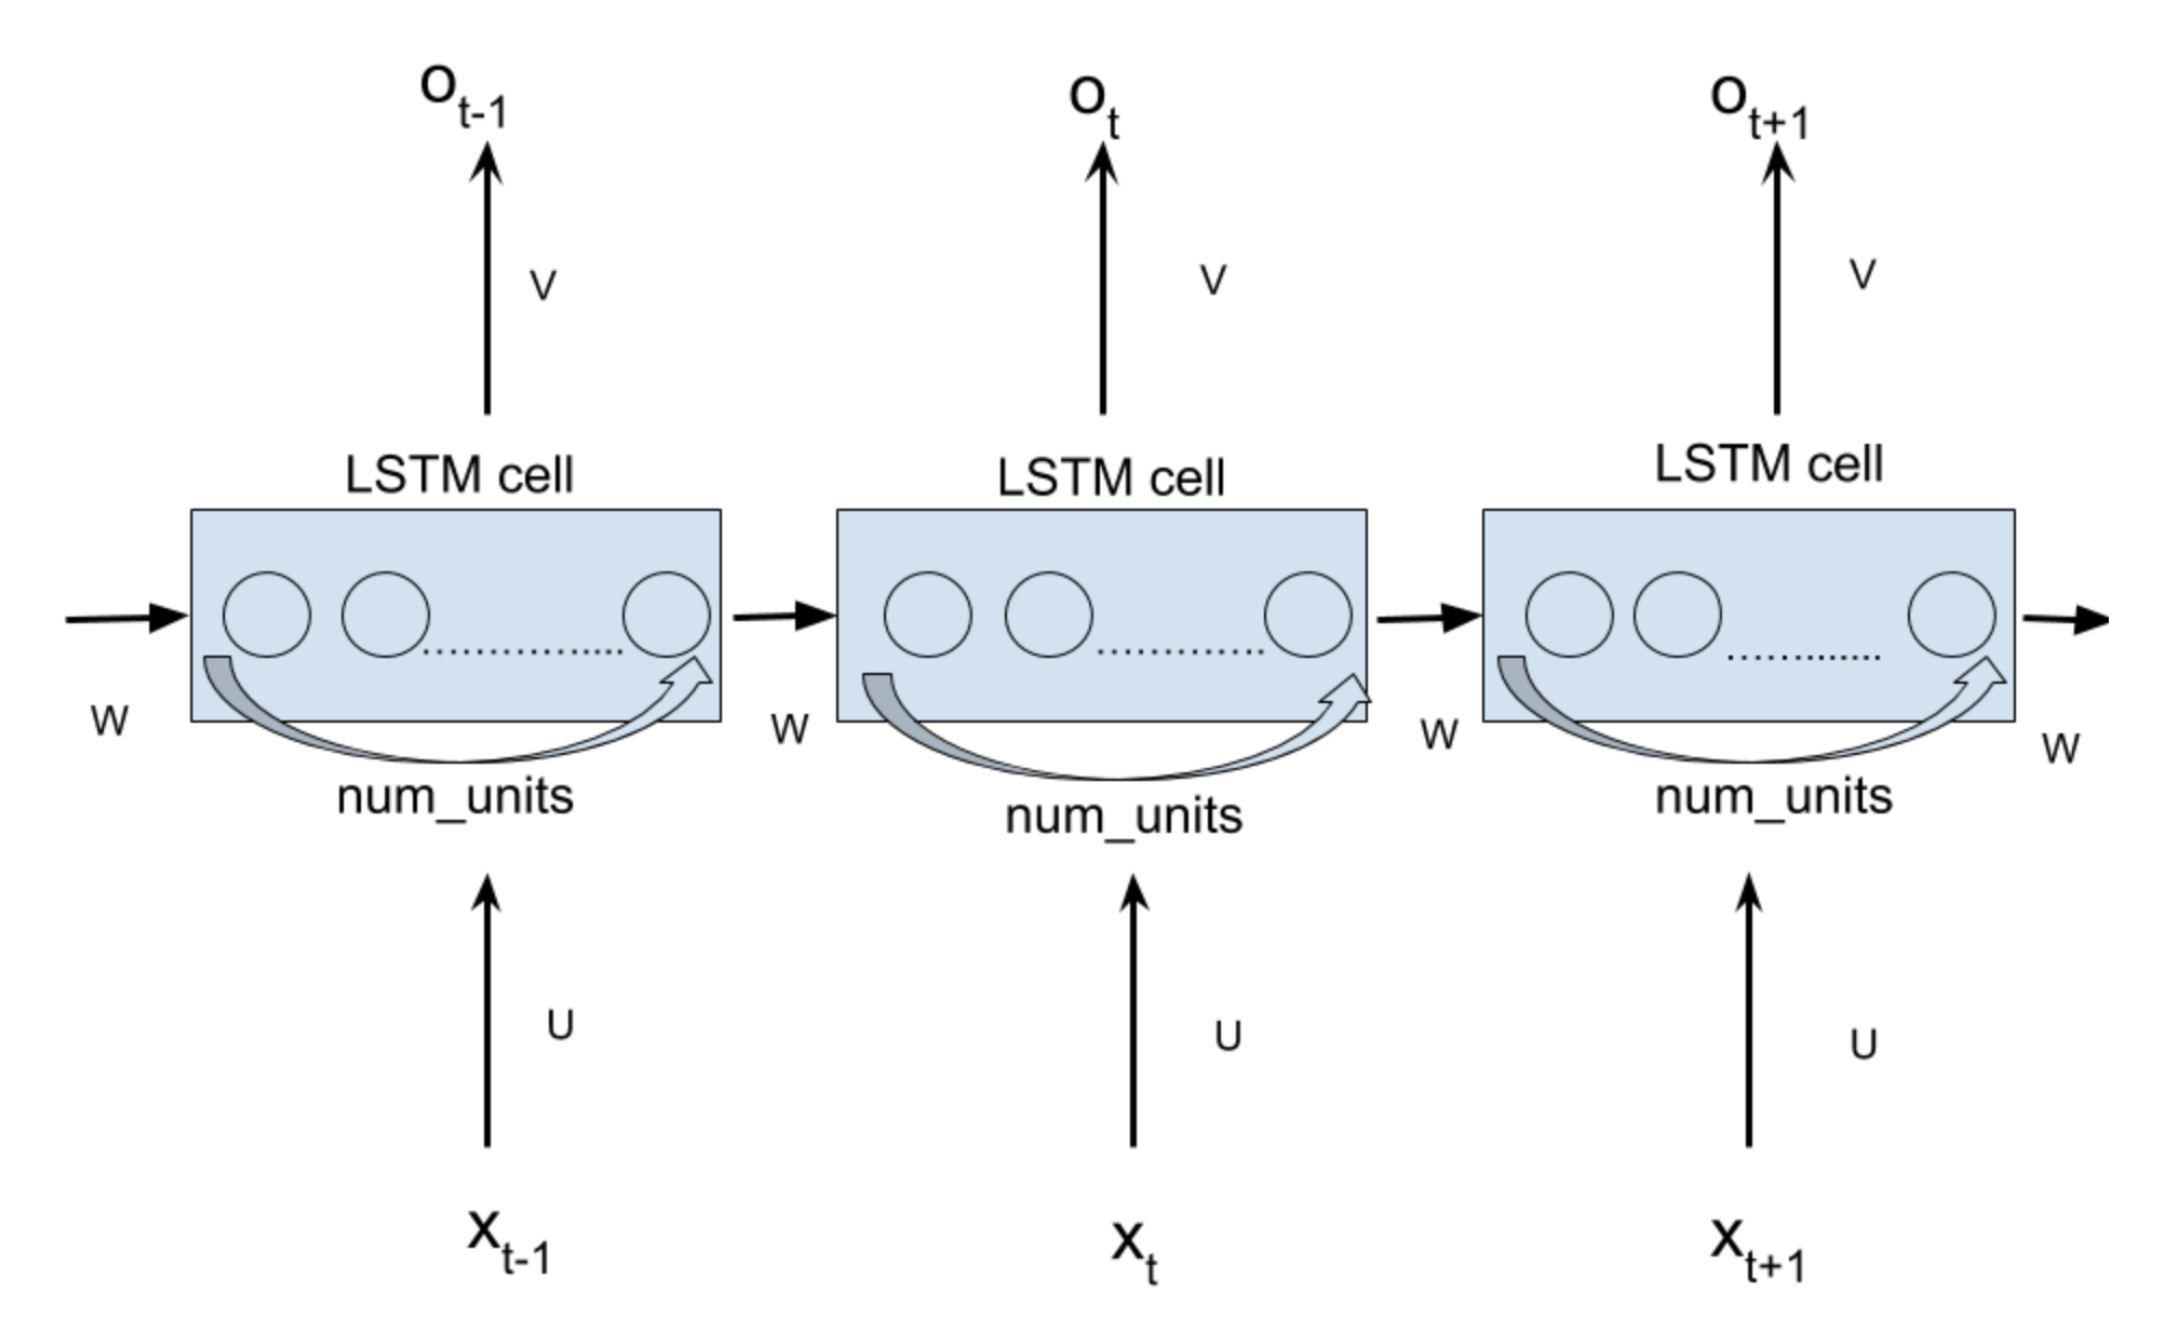

# La capa Dense, el optimizador y la función de pérdida.

La  capa Dense conecta cada una de las capas  del LSTM y define el némero de salidas de la capa de predicción. El optimizador "adam" es un método de descenso de gradiente estocástico que se basa en la estimación adaptativa de los momentos de primer y segundo orden. Este  método es computacionalmente eficiente, tiene pocos requisitos de memoria, invariante a la reescalación diagonal de los gradientes y es muy adecuado para problemas que son grandes en términos de datos/parámetros". Finalmente, la función de pérdida, loss="mse",su sigla en inglés; Mean Squared Error (MSE) es el error cuadrado medio que es la función de pérdida más utilizada. El propósito de las funciones de pérdida es calcular la cantidad que un modelo debe tratar de minimizar durante el entrenamiento.  La pérdida es la media de datos supervisados de las diferencias al cuadrado entre los valores verdaderos y predichos,  su fórmula se puede definir como:

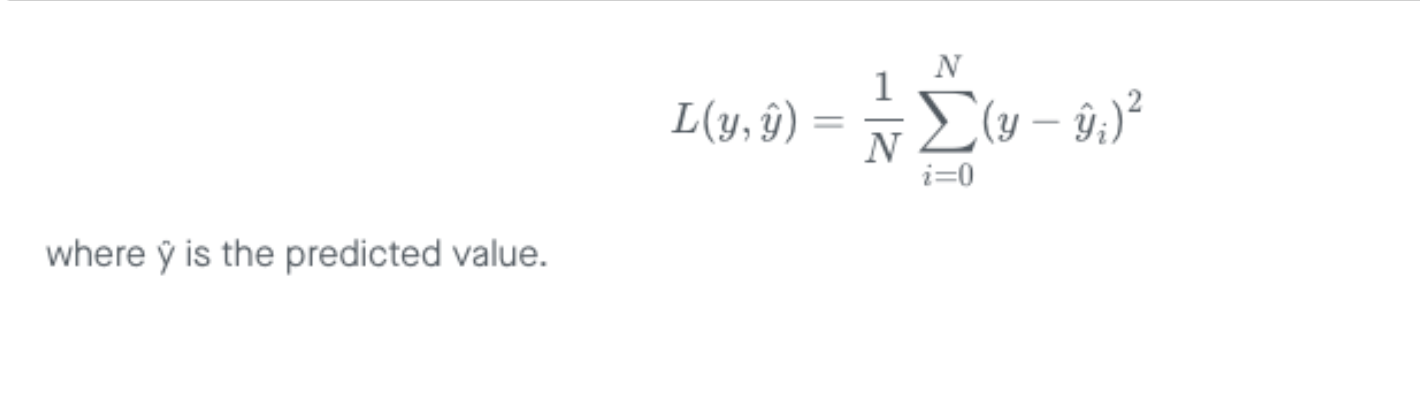

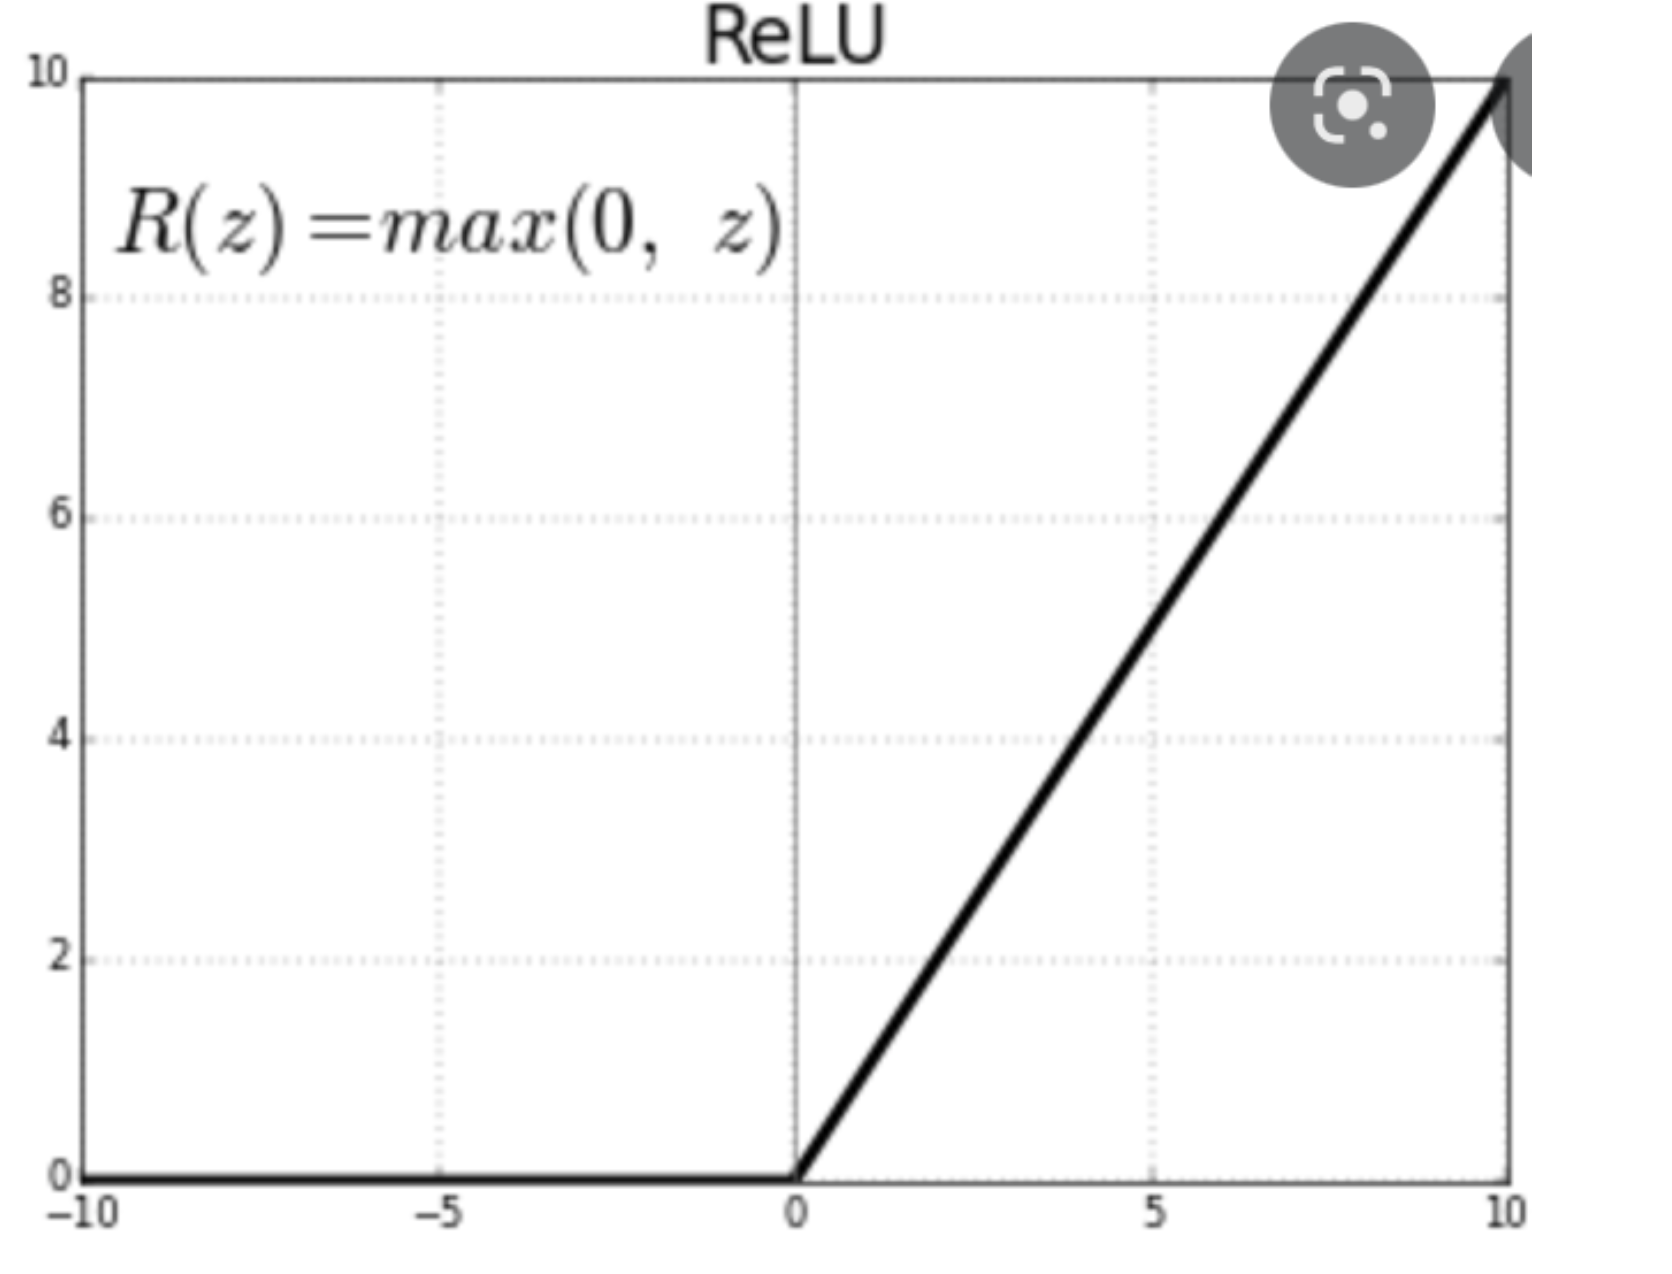

# Modelo de LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 10502 (41.02 KB)
Trainable params: 10502 (41.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Modelo BiLSTM

In [ ]:
from keras.layers import Bidirectional

modelb = Sequential()
modelb.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, 1)))
modelb.add(Dense(2))
modelb.compile(optimizer='adam', loss='mse')


# Entrenamiento del modelo

model.fit; significa que podemos ajustar un modelo a los datos y que lo podemos usar después. Ajustar un modelo significa entrenar nuestro modelo con base en el dataset, es decir, pasar los datos al modelo para que el modelo pueda actualizar sus variables matemáticas internas y prepararse para hacer predicciones. Aquí estamos utilizando los datos que hemos dividido, es decir, los datos de entrenamiento para ajustar el modelo y lo validamos con un porcentaje de los datos de entrenamiento.

Mientras encajamos, podemos pasar varios parámetros como batch_size, epochs, verbose, validation_data, etc.
La configuración del conjunto de entrenamiento consiste del  dataset  que  son tuplas (X1,X2) donde X1 es el número n  y X2 la lista de dos consecutivos (n+1,n+2). Para el entrenamiento se tomaron 500 épocas y tramos o ventanas  de longitud 5  y el parámetro validation_split es el conjunto de validación el cual es el 20% del conjunto de entrenamiento.

In [ ]:
model.fit(X1,X2, epochs=1000, validation_split=0.2, batch_size=10)

Epoch 1/1000
2/2 [==============================] - 0s 143ms/step - loss: 0.0283 - val_loss: 0.2591
Epoch 2/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.0282 - val_loss: 0.2603
Epoch 3/1000
2/2 [==============================] - 0s 116ms/step - loss: 0.0281 - val_loss: 0.2611
Epoch 4/1000
2/2 [==============================] - 0s 86ms/step - loss: 0.0281 - val_loss: 0.2621
Epoch 5/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.0280 - val_loss: 0.2607
Epoch 6/1000
2/2 [==============================] - 0s 109ms/step - loss: 0.0280 - val_loss: 0.2567
Epoch 7/1000
2/2 [==============================] - 0s 108ms/step - loss: 0.0279 - val_loss: 0.2542
Epoch 8/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.0278 - val_loss: 0.2497
Epoch 9/1000
2/2 [==============================] - 0s 135ms/step - loss: 0.0278 - val_loss: 0.2453
Epoch 10/1000
2/2 [==============================] - 0s 152ms/step - loss: 0.0277 - val_loss: 0.2436
Ep

In [ ]:
modelb.fit(X1,X2, epochs=1000, validation_split=0.2, batch_size=10)

Epoch 1/1000
2/2 [==============================] - 0s 77ms/step - loss: 2.1406 - val_loss: 7.6224
Epoch 2/1000
2/2 [==============================] - 0s 35ms/step - loss: 2.1330 - val_loss: 7.5447
Epoch 3/1000
2/2 [==============================] - 0s 32ms/step - loss: 2.1250 - val_loss: 7.4707
Epoch 4/1000
2/2 [==============================] - 0s 33ms/step - loss: 2.1182 - val_loss: 7.3992
Epoch 5/1000
2/2 [==============================] - 0s 33ms/step - loss: 2.1098 - val_loss: 7.3051
Epoch 6/1000
2/2 [==============================] - 0s 39ms/step - loss: 2.1051 - val_loss: 7.1877
Epoch 7/1000
2/2 [==============================] - 0s 35ms/step - loss: 2.0949 - val_loss: 7.1355
Epoch 8/1000
2/2 [==============================] - 0s 33ms/step - loss: 2.0882 - val_loss: 7.0853
Epoch 9/1000
2/2 [==============================] - 0s 41ms/step - loss: 2.0810 - val_loss: 7.0651
Epoch 10/1000
2/2 [==============================] - 0s 32ms/step - loss: 2.0727 - val_loss: 7.0109
Epoch 11/

# Testeo  del modelo model

Una vez entrenado el modelo con "model.fit", podemos hacer predicciones sobre los datos de la prueba o un dato nuevo. En este caso el dato de entrada nuevo es  30. En la salida, deberíamos obtener un vector que contenga 31 y 32. La salida que predice la red neuronal LSTM es [[30.240541 30.420828]], que en realidad está muy cerca de la salida esperada. Hay que redimensionar la entrada tes_input para que pueda ser procesada por model.predict y verbose sirve para definir la forma como se muestra la predicción.

# Testeo del modelo de LSTM

In [ ]:
test_input = array([30])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=1)
print(test_output)

1/1 [==============================] - 0s 210ms/step
[[29.183    29.327812]]


# Testeo del modelo BiLSTM

In [ ]:
test_input = array([30])
test_input = test_input.reshape((1, 1, 1))
test_output = modelb.predict(test_input, verbose=0)
print(test_output)

[[37.469856 40.4527  ]]
